In [9]:
from cucim.skimage.exposure import rescale_intensity
from cucim.skimage.color import rgba2rgb,rgb2hed,hed2rgb
from glob import glob
import cupy as cp
import os
import matplotlib.pyplot as plt
from skimage import io

In [154]:
paths=sorted(glob("/home/saab/Desktop/Processed_Data/Preprocessed_Data/Validation/original/*.jpg"))
print(paths[-1])
print(len(paths))


/home/saab/Desktop/Processed_Data/Preprocessed_Data/Validation/original/Lung T STR 192-14_H&E_20220405_s18.jpg
18


In [155]:
for k in range(len(paths)):
    print(k)
    img=io.imread(paths[k])
    #plt.imshow(img)
    img_cp=cp.asarray(img)
    #img_cp=rgba2rgb(img_cp)
    img_hed=rgb2hed(img_cp)
    p1=cp.percentile(img_hed[:, :, 0], 99)
    p2=cp.percentile(img_hed[:, :, 1], 99)
    null = cp.zeros_like(img_hed[:, :, 0])
    #p3=cp.percentile(img_hed[:, :, 2], 99)
    h = rescale_intensity(img_hed[:, :, 0], out_range=(0, 1),in_range=(0, p1.item()))
    e = rescale_intensity(img_hed[:, :, 1], out_range=(0, 1),in_range=(0, p2.item()))
    #d = rescale_intensity(img_hed[:, :, 2], out_range=(0, 1),in_range=(0, p3.item()))
    ihc_h = hed2rgb(cp.stack((h, e, null), axis=-1))
    
    #zdh = cp.dstack((h,e, null))
    #zdh_np=cp.asnumpy(zdh)
    #plt.figure(figsize=(15, 15))
    #plt.imshow(zdh_np)
    #plt.imsave("/home/saab/Desktop/Processed_Data/Preprocessed_Data/Same_Slide/27May/Normalized/"+f"{k:03d}"+".png"
    #           ,cp.asnumpy((ihc_h*255).astype(cp.uint8)))
    plt.imsave("/home/saab/Desktop/Processed_Data/Preprocessed_Data/Validation/original_normalized/"+paths[k].split("/")[-1]
               ,cp.asnumpy((ihc_h*255).astype(cp.uint8)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [134]:

ihc_e = hed2rgb(cp.stack((null, e, null), axis=-1))
ihc_d = hed2rgb(cp.stack((img_hed[:,:,0], img_hed[:,:,1], null), axis=-1))
h_o=hed2rgb(cp.stack((img_hed[:, :, 0], null, null), axis=-1))
e_o=hed2rgb(cp.stack((null, img_hed[:, :, 1], null), axis=-1))
d_o=hed2rgb(cp.stack((null, null, img_hed[:, :, 2]), axis=-1))

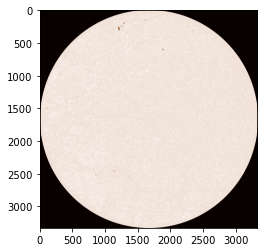

In [129]:

plt.imshow(cp.asnumpy(d_o))

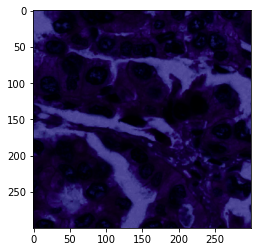

In [135]:
plt.imshow(cp.asnumpy(ihc_h))
plt.imsave("/home/saab/Desktop/blue_new.png",cp.asnumpy((d_o*255).astype(cp.uint8)))
plt.imsave("/home/saab/Desktop/blue_old.png",cp.asnumpy((ihc_h*255).astype(cp.uint8)))

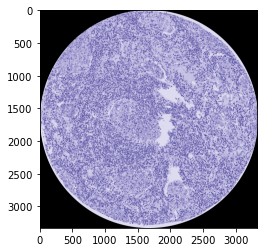

In [94]:
plt.imshow(cp.asnumpy((ihc_d*255).astype(cp.uint8)))

In [96]:
cp.min(((ihc_d*255).astype(cp.uint8)).reshape(-1))

array(0, dtype=uint8)

In [92]:
(ihc_d*255).astype(cp.uint8)

array([[[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       ...,

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]]], dtype=uint8)